# ESP32-CAM

El módulo ESP32-CAM es un microcontrolador avanzado de 32 bit , un módulo WiFi, bluetooth, una  cámara de vídeo incorporada y ranura micro SD incorporada. 
   - Procesador dual core Xtensa® LX6 de 32 bitsWiFi 802.11b/g/n + Bluetooth 4.2 con BLE. Soporta carga de imagen por WiFi.
   - Conexiones: UART, SPI, I2C, y PWM. Tiene 9 pines GPIO.
   - Frecuencia de reloj: hasta 160Mhz.
   - Memoria: 520KB de SRAM +  4MB de PSRAM + SD slot para tarjetas
   - Extras: tiene múltiples modos de reposo, firmware actualizable por OTA, y LED para uso de memoria flash built-in.
   - Cámara: soporta cámaras OV2640 que pueden venir en el pack o comprarse independientemente. Este tipo de cámaras tienen:
        - 2 MP en su sensor
        - Tamaño de arreglo UXGA de 1622×1200 px
        - Formato de salida YUV422, YUV420, RGB565, RGB555 y compresión de datos de 8-bit.
        - Puede transferir imagen entre 15 y 60 FPS.
   - Bluetooth 4.2 2.4 Ghz; BT 2.0 y 4.0 BLE
   - 36 GPIO pins.
   - 16 x Analog-to-Digital Converter (ADC) de 12 bits de resolución y se pueden programar con límite de entrada a 1V, 2 V y 4V
   - 2 x Digital to Analog converter DAC de 8 bits.
   - Pueden definirse hasta 16 canales de PWM.
   - 2 x UART o puertas serie
   - 2 x I2C channels y 4 x SPI channels.      
        

 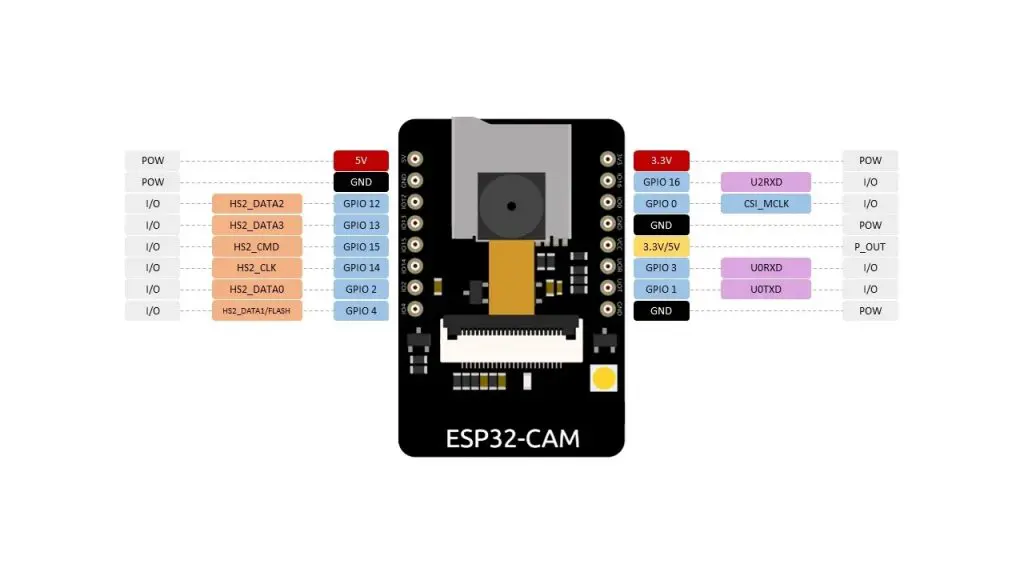

<img src="img/esp-32-esquema.webp" alt="Imagen"></img>

## CP2202
El cp2202 es un conversor serie a usb que utiliza el chip set CP1202. Se debe usar el driver del chip.
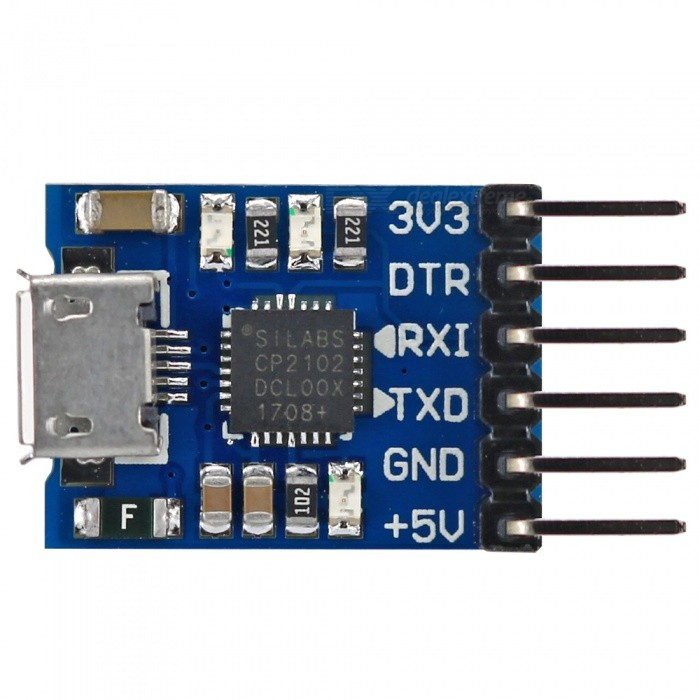
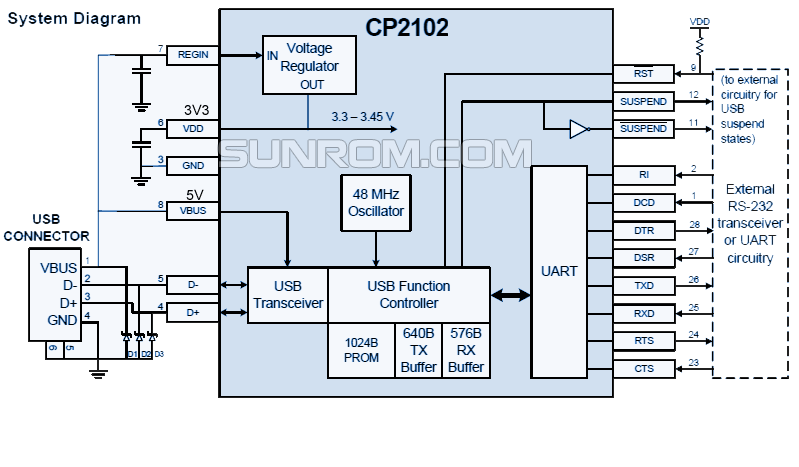

Features:
   - chipset CP2102.
   - Especificacion USB 2.0
   - Standard USB tipo A 
   - 6pins para 3.3V, RST, TXD, RXD, GND & 5V.
   - Baud rates: 300 bps to 1.5 Mbps.
   - Byte receive buffer; 640 byte transmit buffer.
   - Hardware or X-On/X-Off handshaking supported.
   - Event character support Line break transmission.
   - USB suspend states supported via SUSPEND pins.
   - Rango de Temperatura: -40 to +85.
   - Tamaño: 42mm X 15mm.
   - Peso: 4g  
   Este es el grabador que compre
   
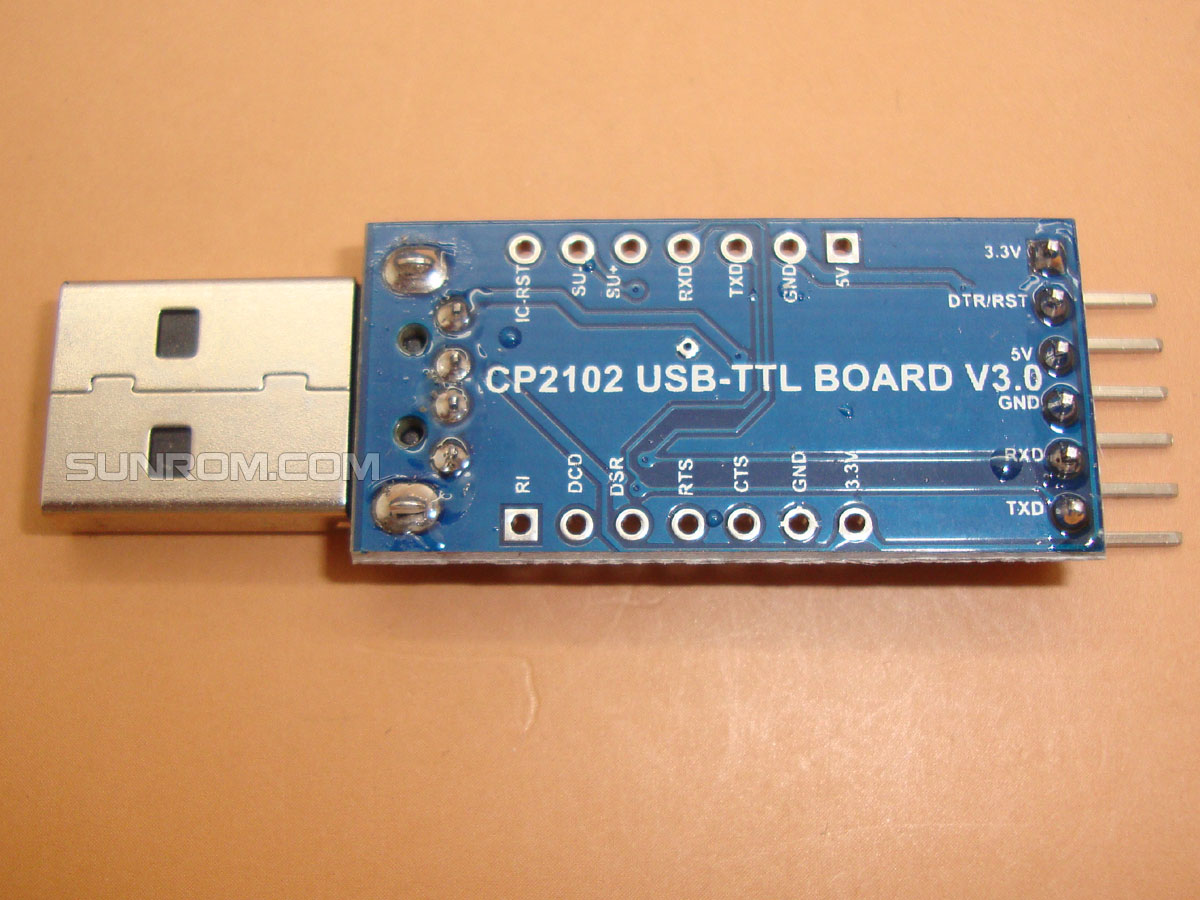

Como conectar esp32 con cp2002

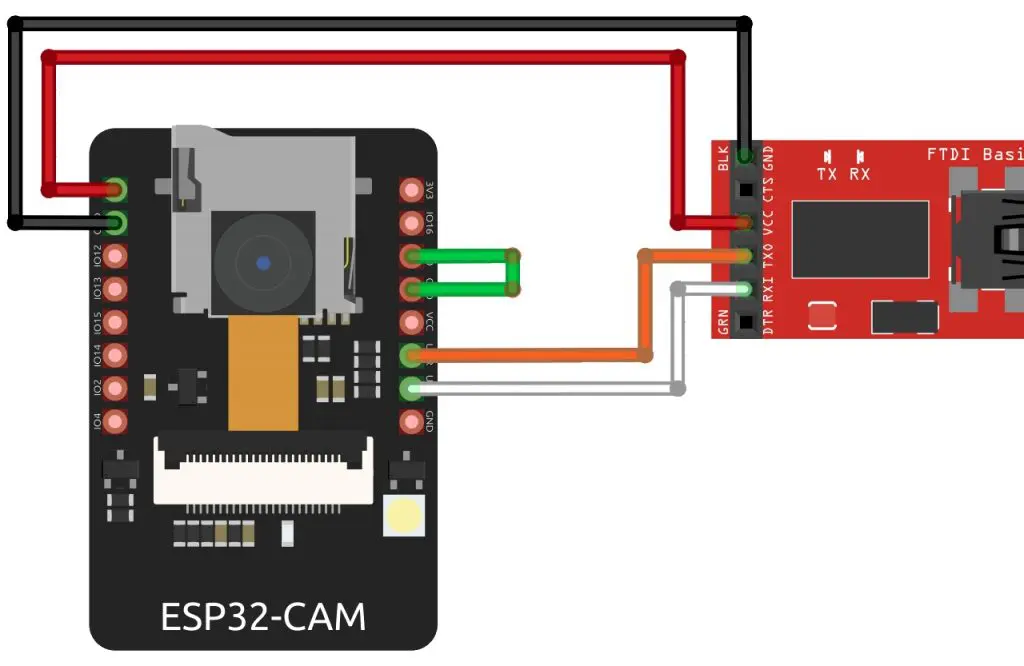

## SERVO 

Para conectar un servo se debe usar la libreria ESP32Servo

Instalar la libreria ESP32Servo Library  


|      |                                                    |              |
|---   |---                                                 |---                                 |
|      |virtual ~ESP32PWM ()                            |Constructor                         |
|      |void detachPin ( pin)                            | Desconecta las funciones del servo |
|      |void attachPin ( pin,  freq,  resolution_bits=10)| conecta las funciones servo al pin|
|      |                                                 | pin entero 8 bit|
|      |                                                 | freq doble|
|      |                                                 |resolution uint8|
|      |bool attached ()                                 |Conecta el servo                  |
|      |void write (uint32_t duty)                       |Escribe el angulo |
 
void 	writeScaled (float duty)
 
double 	writeTone (double freq)
 
double 	writeNote (note_t note, uint8_t octave)
 
void 	adjustFrequency (double freq, float dutyScaled=-1)
 
uint32_t 	read ()
 
double 	readFreq ()
 
float 	getDutyScaled ()
 
int 	getTimer ()
 
int 	getChannel ()
 
int 	getPin ()


### Consumo ESP32 Alimentado por Batería

Algunos valores de consumo de energía determinados del chip ESP32:

|Modo ESP32|	Consumo| 
|---       |---        | 
|“Deepsleep”|	7 µA| 
|“Lightsleep”|	1 mA| 
|Normal (240 MHz)|	50 mA| 
|Reloj del procesador reducido (3 MHz)|	3,8 mA| 
|Funcionamiento WiFi|	80-180 mA|

Se midio estos valores con el módulo ESP32-WROOM, pero también se alcanzo con la tarjeta ECO Power en funcionamiento con batería. Sin embargo, la mayoría de las tarjetas ESP32 no se acercan a este bajo consumo de energía. Por lo general, las tarjetas ESP32 necesitan alrededor de 20 mA a pesar del modo “deepsleep”. Los factores importantes para el consumo de energía son los circuitos adicionales en la tarjeta, la implementación de la fuente de alimentación USB y la implementación de la operación por batería. Con las tarjetas ESP32 regulares.


### Elección de las pilas o baterías recargables adecuadas

El ESP32 funciona siempre entre 2,55 y 3,6 voltios. Las extensiones externas, como una pantalla u otros componentes, a menudo requieren al menos 3,3 voltios. 

1. Banco de energia
2. NI- MH o pila standar
3. Pilas de litio
4. Pilas de LiFePO4
5. Baterias recargables polímero de litio


### Banco de energia

Esta es la peor opción. Tal banco de energía utiliza internamente una batería de litio de 3,7 V, luego transforma este voltaje a 5 voltios con pérdida y un ESP32 conectado utiliza un LDO (low drop-out voltage regulator) que reduce el voltaje de 5 a 3,3 voltios. 

### Ni-MH o pilas estándar (2 x 1,5 V)

El funcionamiento directo con dos baterías de Ni-MH no funciona, ya que una sola batería suministra aproximadamente 1,2 voltios, es decir, 2,4 voltios con dos baterías. Esto es demasiado poco para los 2,55 voltios requeridos, que el ESP32 necesita por lo menos. Tres baterías de Ni-MH conectadas en serie tampoco son una opción, ya que el voltaje máximo de 3,6 V para el ESP32 se supera con las baterías llenas.

Con pilas normales (excepto de litio) esto no funciona durante mucho tiempo, porque el voltaje mínimo del ESP32 de 2,55 V no se alcanza después de un cierto tiempo de funcionamiento y la batería sigue estando al 70 % de su capacidad total. Además, el ESP32 en WiFi necesita impulsos de 400 mA a corto plazo: la tensión de las pilas normales se desploma y el ESP32 se reinicia.

### Pilas de litio

Ya sean dos baterías de litio de 1,5 V en serie o una CR123 de 3 V: todo funciona perfectamente con baterías de litio. Estos mantienen un voltaje de 3 V bastante constante, a menos de 2,7 voltios se utiliza más del 90 % de la capacidad de una batería de litio, a 2,55 voltios está prácticamente vacía. Las baterías de litio también proporcionan los altos requerimientos de energía a corto plazo de la operación WiFi sin ningún problema. Por ejemplo, un Varta CR123 (3 V, 1700 mAh) puede utilizarse en modo de reposo durante más de 5 años, dependiendo, por supuesto, de la frecuencia con la que el ESP32 se despierta y tiene que hacer algo, o de la duración y frecuencia con la que se utiliza WiFi o Bluetooth.


### Pilas de LiFePO4

Las modernas pilas LiFePO4 también funcionan de forma excelente, pero proporcionan aproximadamente un 70 % menos de energía que una pila de litio del mismo tamaño. Sin embargo, las baterías LiFePO4 se pueden recargar o sustituir por una batería cargada. Las baterías LiFePO4 también ofrecen un alto rendimiento sin problemas para el funcionamiento WiFi, pero no tienen la desventaja de las baterías de polímero de litio, que pueden incendiarse si se utilizan de forma incorrecta o si la calidad es deficiente.

### Baterias recargables polímero de litio o de litio

Claro que pueden utilizarse las baterías LiPo o de litio porque proporcionan suficiente energía para el ESP32. Sin embargo, la tensión de 3,7 a 4,2 V es demasiado alta para el ESP32, dependiendo del estado de carga, por lo que debe reducirse. Esto tiene la desventaja de que una gran parte de la energía se utiliza permanentemente para reducir la tensión a 3,3 V. Los controladores LDO simples requieren aproximadamente 2000 veces más energía para el modo de reposo que el ESP32 en el modo de sueño profundo (“deepsleep”), cada segundo, las 24 horas del día, los 365 días del año. Incluso los mejores controladores necesitan mucha potencia.




### Resumen
La mejor opcion es la bateria de litio


### Bateria litio BL-5C
<img src="img/bl-5c.jpg" alt="Imagen"></img>


### Caracteristicas

|Característica| Valor |
|---           |---    |
|Voltaje       | 3.7 V        |
|Capacidad     |950-1200 mAh  |
|Tipo          |Ion de litio  |
|Altura        |53 mm         |
|Ancho         |43 mm         |
|Profundidad   |3 mm          |
|Número de ciclos de carga / descarga| ~1000 |
|Peso          |23 gr         |



## Cargador de baterias de litio

<img src="img/tp4056.jpg" alt="Imagen"></img>

El TP4056 es un chip encapsulado en formato SOP-8 que es capaz de gestionar la carga de una batería. Es decir, adecua la entrada de energía para el estándar de 1A de la mayoría de baterías de litio que se usan en la industria electrónica, y también es capaz de controlar la temperatura.

Caracteristicas importante del módulo TP4056:

1. El puerto miniUSB para alimentar la batería
2. Dos LEDs de Carga y de Completado avisan  cuándo la batería está cargándose o cuándo ha terminado el proceso.
3. B+ y B- son los bornes de salida que irán conectados a los bornes de la batería que necesitas cargar.
4. OUT+ y OUT- son los bornes para la carga.
